In [50]:
import pandas as pd
import io
import requests
import sklearn
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
%pylab inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Assignment overview


You should implement five learning algorithms. They are for:

* Decision trees with some form of pruning

* Neural networks

* Boosting

* Support Vector Machines

* k-nearest neighbors

Each algorithm is described in detail in your textbook, the handouts, and all over the web. In fact, instead of implementing the algorithms yourself, you may (and by may I mean should) use software packages that you find elsewhere; however, if you do so you should provide proper attribution. Also, you will note that you have to do some fiddling to get good results, graphs and such, so even if you use another's package, you may need to be able to modify it in various ways.

Decision Trees. For the decision tree, you should implement or steal a decision tree algorithm (and by "implement or steal" I mean "steal"). Be sure to use some form of pruning. You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use.

Neural Networks. For the neural network you should implement or steal your favorite kind of network and training algorithm. You may use networks of nodes with as many layers as you like and any activation function you see fit.

Boosting. Implement or steal a boosted version of your decision trees. As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.

Support Vector Machines. You should implement (for sufficently loose definitions of implement including "download") SVMs. This should be done in such a way that you can swap out kernel functions. I'd like to see at least two.

k-Nearest Neighbors. You should "implement" (the quotes mean I don't mean it: steal the code) kNN. Use different values of k.

Testing. In addition to implementing (wink), the algorithms described above, you should design two interesting classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples. I don't care where you get the data. You can download some, take some from your own research, or make some up on your own. Be careful about the data you choose, though. You'll have to explain why they are interesting, use them in later assignments, and come to really care about them.

---------------
What to Turn In
---------------

You must submit:

* a file named README.txt containing instructions for running your code (see note below)

* a file named yourgtaccount-analysis.pdf containing your writeup

Note below: if the data are way, way, too huge for submitting, see if you can arrange for an URL. This also goes for code, too. Submitting all of Weka isn't necessary, for example, because I can get it myself; however, you should at least submit any files you found necessary to change and enough support and explanation so we could reproduce your results if we really wanted to do so. In any case, include all the information in README.txt

The file yourgtaccount-analysis.pdf should contain:

* a description of your classification problems, and why you feel that they are interesting. Think hard about this. To be at all interesting the problems should be non-trivial on the one hand, but capable of admitting comparisons and analysis of the various algorithms on the other. 

* the training and testing error rates you obtained running the various learning algorithms on your problems. At the very least you should include graphs that show performance on both training and test data as a function of training size (note that this implies that you need to design a classification problem that has more than a trivial amount of data) and--for the algorithms that are iterative--training times/iterations. Both of these kinds of graphs are referred to as learning curves, BTW.

* analyses of your results. Why did you get the results you did? Compare and contrast the different algorithms. What sort of changes might you make to each of those algorithms to improve performance? How fast were they in terms of wall clock time? Iterations? Would cross validation help (and if it would, why didn't you implement it?)? How much performance was due to the problems you chose? How about the values you chose for learning rates, stopping criteria, pruning methods, and so forth (and why doesn't your analysis show results for the different values you chose?)? Which algorithm performed best? How do you define best? Be creative and think of as many questions you can, and as many answers as you can.

For the sanity of your graders, please keep your analysis as short as possible while still covering the requirements of the assignment: to facilitate this sanity, analysis writeup is limited to 12 pages.



----------------
Grading Criteria
----------------

You are being graded on your analysis more than anything else. Roughly speaking, implementing everything and getting it to run is worth maybe 0% of the grade on this assignment (I know you don't believe me, but in fact, steal the code; I not only don't care, I am encouraging you to use one of the many packages available both from the resources page and on the web). Of course, analysis without proof of working code makes the analysis suspect.

The key thing is that your explanations should be both thorough and concise. Imagine you are writing a paper for the major conference in your field the year you will be graduating and you need to impress all those folks who will be deciding whether to interview you later. You don't want them to think you're shallow do you? Or that you're incapable of coming up with interesting classification problems, right? And you surely don't want them to think that you make up for a lack of content by blathering on about irrelevant aspects of your work? Of course not.

Finally, I'd like to point out that I am very particular about the format of the assignments. Follow the directions carefully. Failure to turn in files with the proper naming scheme, or anything else that makes the graders' lives unduly hard is simply going to lead to an ignored assignment. I am remarkably inflexible about this. Also, there will be no late assignments accepted, so start now. Have fun. One day you'll look back on this and smile. There may be tears, but they will be tears of joy.

When your assignment is graded, you will receive feedback explaining your errors (and your successes!) in some

# Data set one

- Will an adult make more than $50? https://archive.ics.uci.edu/ml/datasets/Adult
- Features:
- Goal: 

In [65]:

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
cross_validation_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
adult_data=requests.get(url).content
adult_data_validation = requests.get(cross_validation_url).content

KeyboardInterrupt: 

- Features

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, - 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-- clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, - Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

In [78]:
cols =[ 'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
          'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_bracket']

In [ ]:
adult_income_df = pd.read_csv(io.StringIO(adult_data.decode('utf-8')), names=cols)
adult_income_validation_df = pd.read_csv(io.StringIO(adult_data_validation.decode('utf-8')), names=cols)

In [3]:
# #save as csv
#adult_income_df.to_csv('./data/adult_income.csv')
# adult_income_validation_df.to_csv('./data/adult_income_validation.csv')
adult_income_df = pd.read_csv('./data/adult_income.csv')

In [4]:
# If reading it in
adult_income_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
adult_income_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Convert features to numerical features

In [6]:
le_reverse_mapping_adult_income = {}
def transform_text_to_label(df, text_cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'sex', 'native_country', 'income_bracket', 'race']):
    le = LabelEncoder()
    for col in text_cols:
        df['transformed_'+col] = le.fit_transform(df[col])
        df = df.drop(col, axis=1)
        le_reverse_mapping_adult_income[col] = le
    return df
        
    

In [7]:
le_reverse_mapping_adult_income

{}

In [8]:
transformed_adult_income_df = transform_text_to_label(adult_income_df)



In [9]:
transformed_adult_income_df.transformed_income_bracket.value_counts()

0    24720
1     7841
Name: transformed_income_bracket, dtype: int64

In [40]:
transformed_adult_income_df.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'transformed_workclass', 'transformed_education',
       'transformed_marital_status', 'transformed_occupation',
       'transformed_relationship', 'transformed_sex',
       'transformed_native_country', 'transformed_income_bracket',
       'transformed_race'],
      dtype='object')

# EDA

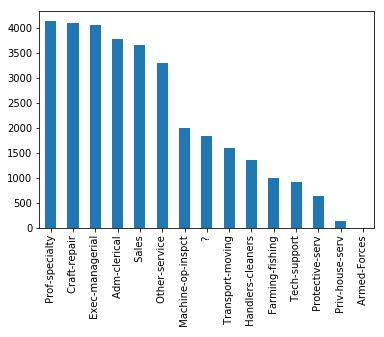

In [10]:
adult_income_df.occupation.value_counts().plot(kind='bar')

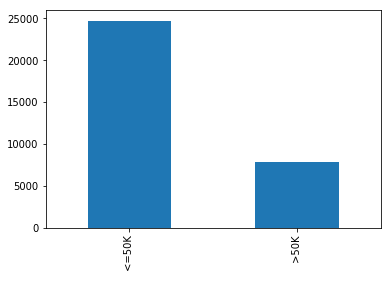

In [105]:
adult_income_df.income_bracket.value_counts().plot(kind='bar')

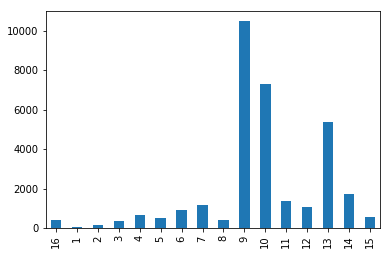

In [106]:
adult_income_df.education_num.value_counts(sort=False).plot(kind='bar')

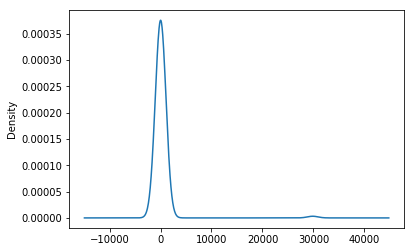

In [27]:
adult_income_df.capital_gain.value_counts(sort=False).plot(kind='kde')

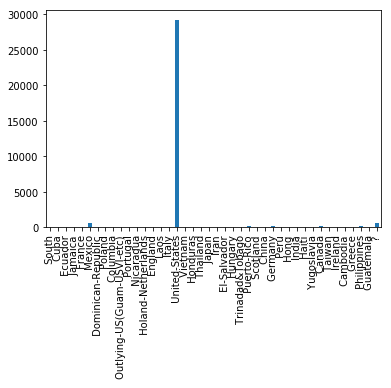

In [29]:
adult_income_df.native_country.value_counts(sort=False).plot(kind='bar')

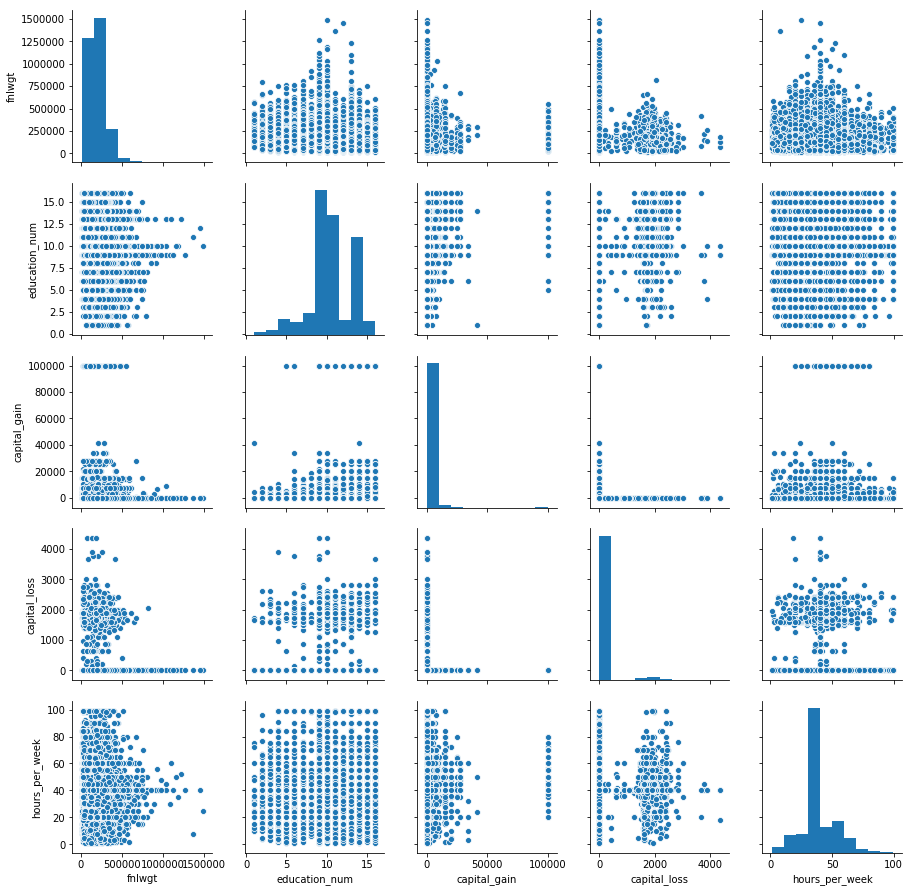

In [42]:
sns.pairplot(adult_income_df)

In [41]:
X_transformed_adult_income_df = transformed_adult_income_df.iloc[:, transformed_adult_income_df.columns != 'transformed_income_bracket']
Y_transformed_adult_income_df = transformed_adult_income_df['transformed_income_bracket']

# Data Set Two - Will a client subscribe to a term depost?

- The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 



 Input variables:
   - bank client data:
   - 1 - age (numeric)
   - 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   - 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   - 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   - 5 - default: has credit in default? (categorical: "no","yes","unknown")
   - 6 - housing: has housing loan? (categorical: "no","yes","unknown")
   - 7 - loan: has personal loan? (categorical: "no","yes","unknown")
   - related with the last contact of the current campaign:
   - 8 - contact: contact communication type (categorical: "cellular","telephone") 
   - 9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  - 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  - 11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   - other attributes:
  - 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  - 14 - previous: number of contacts performed before this campaign and for this client (numeric)
  - 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   - social and economic context attributes
  - 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  - 17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  - 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  - 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  - 20 - nr.employed: number of employees - quarterly indicator (numeric)

  - Output variable (desired target):
  - 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [11]:
banking_df = pd.read_csv('data/bank-full.csv', delimiter =';')

In [12]:
banking_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


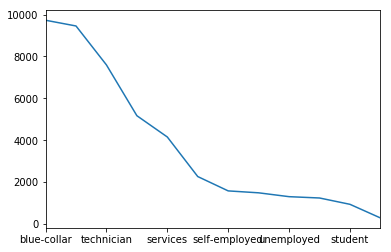

In [13]:
banking_df.job.value_counts().plot()


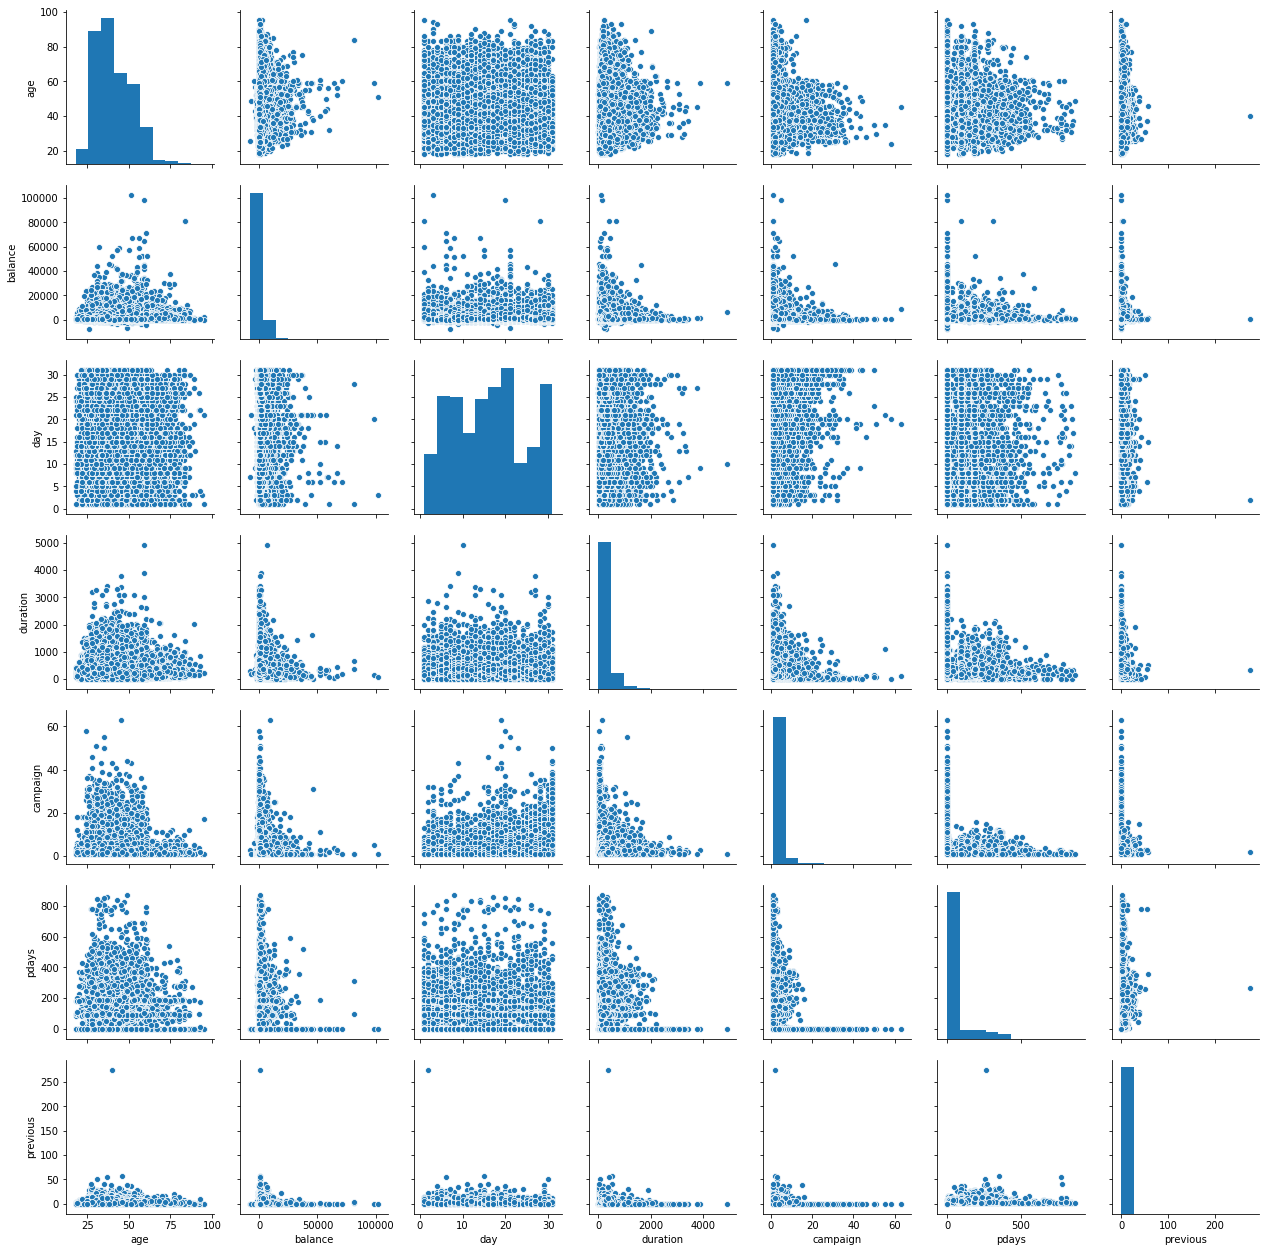

In [14]:
sns.pairplot(banking_df)

# Convert text features to label-encoded features

In [61]:
banking_text_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y', 'default']

In [62]:
transformed_banking_df = transform_text_to_label(banking_df, banking_text_cols)

In [63]:
transformed_banking_df.head()

,age,balance,day,duration,campaign,pdays,previous,transformed_job,transformed_marital,transformed_education,transformed_housing,transformed_loan,transformed_contact,transformed_month,transformed_poutcome,transformed_y,transformed_default
0,58,2143,5,261,1,-1,0,4,1,2,1,0,2,8,3,0,0
1,44,29,5,151,1,-1,0,9,2,1,1,0,2,8,3,0,0
2,33,2,5,76,1,-1,0,2,1,1,1,1,2,8,3,0,0
3,47,1506,5,92,1,-1,0,1,1,3,1,0,2,8,3,0,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,2,8,3,0,0


In [64]:
X_transformed_banking_df = transformed_banking_df.iloc[:, transformed_banking_df.columns != 'transformed_y']
Y_transformed_banking_df = transformed_banking_df['transformed_y']

In [65]:
X_transformed_banking_df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'transformed_job', 'transformed_marital', 'transformed_education',
       'transformed_housing', 'transformed_loan', 'transformed_contact',
       'transformed_month', 'transformed_poutcome', 'transformed_default'],
      dtype='object')

# Is the data set balanced?

In [72]:
transformed_banking_df['transformed_y'].value_counts()

0    39922
1     5289
Name: transformed_y, dtype: int64

# Train/Test Split

In [66]:
banking_train_X, banking_test_X, banking_train_Y, banking_test_Y = train_test_split(
    X_transformed_banking_df, Y_transformed_banking_df, test_size=0.3, random_state=0
)   

adult_income_train_X, adult_income_test_X, adult_income_train_Y, adult_income_test_Y  = train_test_split(
    X_transformed_adult_income_df, Y_transformed_adult_income_df, test_size=0.3, random_state=0
)     


# Decision Tree (Random Forest)

In [46]:
rf_adult = RandomForestClassifier()
rf_banking = RandomForestClassifier()

# Plot Learning Curves

In [57]:
# Taken from - https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=3,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 20)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label=str(cv) +"x Cross-validation score")

    plt.legend(loc="best")
    return plt

/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

<module 'matplotlib.pyplot' from '/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/matplotlib/pyplot.py'>

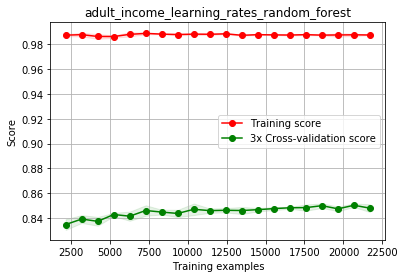

In [69]:
plot_learning_curve(rf_adult, 'adult_income_learning_rates_random_forest', X_transformed_adult_income_df, Y_transformed_adult_income_df)

/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

<module 'matplotlib.pyplot' from '/Users/jonathanhilgart/.pyenv/versions/omscs_ml/lib/python3.6/site-packages/matplotlib/pyplot.py'>

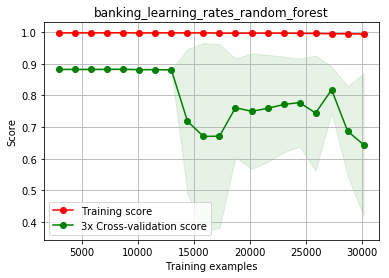

In [70]:
plot_learning_curve(rf_banking, 'banking_learning_rates_random_forest', X_transformed_banking_df, Y_transformed_banking_df)